# Compute median object size per dataset

Decide one patch size for each dataset as 8 * the median size of objects.
* OrgaQuant
* OrganoID
* OrgaSegment
* OrgaExtractor

Choose patch size based on object size in each image (8 * median size):
* Private Organoid dataset
* Neurips data

Don't patch:
* Open Images


Overlap should be 1/6 of each side.

Save images as:

images/trainvaltest/dataset/im_ID/patch_x.png

and offsets for each patch:

images/trainvaltest/dataset/im_ID/offsets.csv


#### Normalization:

Before patching, we apply background correction of each channel using BaSiC and normalize the value range of the 0.01 to 0.99 quantile to [0, 255].

In [ ]:
1+1

2

In [2]:
import numpy as np
import cv2
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from copy import deepcopy
import skimage
import scipy
import basicpy

import sys
sys.path.append('/home/icb/lion.gleiter/projects/organoid_sam/SAM_with_Detection_Head')

from util.box_ops_numpy import mask_to_boxes, cxcywh_to_xyxy, xyxy_to_cxcywh, plot_boxes
from util import dataloading as dl

%load_ext autoreload
%autoreload 2

In [3]:
base_datadir = Path('/ictstr01/groups/shared/users/lion.gleiter/organoid_sam/original_data/')

### OrgaQuant

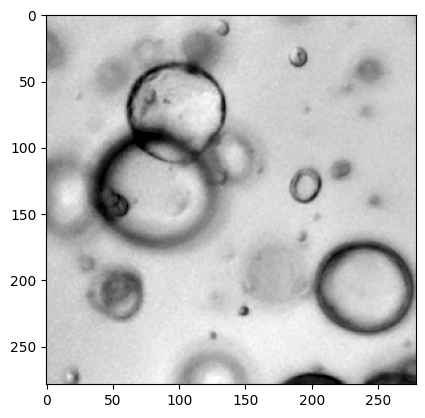

In [4]:
img = cv2.imread('/ictstr01/groups/shared/users/lion.gleiter/organoid_sam/patch_images/val/OrgaQuant_test/im_Subset_1_450x450_002/patch_1.png')
plt.imshow(img)

In [5]:
# img = cv2.imread('/ictstr01/groups/shared/users/lion.gleiter/organoid_sam/unused/own_organoid_dataset/image_patches/04082023 R14 organoids_2x_RAW_ch00_patch_13.png')
# plt.imshow(img)

In [6]:
# labels = np.load('/ictstr01/groups/shared/users/lion.gleiter/organoid_sam/unused/own_organoid_dataset/bboxes/04082023 R14 organoids_2x_RAW_ch00_labels_patch_13.npy')
# labels

In [7]:
labels = np.load('/ictstr01/groups/shared/users/lion.gleiter/organoid_sam/patch_bbox_gt/val/OrgaQuant_test/im_Subset_1_450x450_002/patch_1.npy')
labels

array([[0.74193548, 0.85842294, 0.26523297, 0.27598566],
       [0.47491039, 0.29390681, 0.31899642, 0.3297491 ],
       [0.46236559, 0.70250896, 0.09318996, 0.07168459],
       [0.26523297, 0.35483871, 0.27240143, 0.27240143]])

In [8]:
np.max(np.abs(
    xyxy_to_cxcywh(cxcywh_to_xyxy(labels)) - labels
))

1.1102230246251565e-16

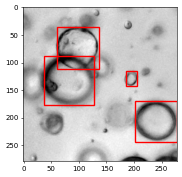

In [9]:
plot_boxes(img, labels)

In [13]:
ds = dl.OrgaQuant(split='train')

patch_size = dl.compute_patch_size(dl.compute_median_size(ds))
patch_size

(3, 4)
(1, 4)
(4, 4)
(5, 4)
(9, 4)
(5, 4)
(4, 4)
(7, 4)
(6, 4)
(7, 4)
(12, 4)
(6, 4)
(5, 4)
(3, 4)
(8, 4)
(7, 4)
(3, 4)
(5, 4)
(7, 4)
(7, 4)
(3, 4)
(3, 4)
(3, 4)
(8, 4)
(3, 4)
(11, 4)
(6, 4)
(5, 4)
(9, 4)
(5, 4)
(8, 4)
(18, 4)
(12, 4)
(7, 4)
(3, 4)
(2, 4)
(4, 4)
(4, 4)
(7, 4)
(2, 4)
(1, 4)
(1, 4)
(2, 4)
(5, 4)
(3, 4)
(1, 4)
(3, 4)
(2, 4)
(1, 4)
(3, 4)
(7, 4)
(3, 4)
(3, 4)
(7, 4)
(2, 4)
(13, 4)
(8, 4)
(8, 4)
(4, 4)
(8, 4)
(14, 4)
(14, 4)
(5, 4)
(6, 4)
(7, 4)
(14, 4)
(7, 4)
(11, 4)
(2, 4)
(4, 4)
(3, 4)
(3, 4)
(7, 4)
(2, 4)
(5, 4)
(8, 4)
(4, 4)
(5, 4)
(5, 4)
(2, 4)
(14, 4)
(7, 4)
(11, 4)
(7, 4)
(9, 4)
(10, 4)
(7, 4)
(17, 4)
(6, 4)
(13, 4)
(6, 4)
(3, 4)
(7, 4)
(8, 4)
(6, 4)
(6, 4)
(6, 4)
(6, 4)
(6, 4)
(7, 4)
(8, 4)
(7, 4)
(13, 4)
(9, 4)
(5, 4)
(9, 4)
(5, 4)
(4, 4)
(6, 4)
(5, 4)
(4, 4)
(5, 4)
(4, 4)
(7, 4)
(9, 4)
(2, 4)
(5, 4)
(6, 4)
(2, 4)
(6, 4)
(4, 4)
(9, 4)
(3, 4)
(4, 4)
(6, 4)
(8, 4)
(3, 4)
(3, 4)
(8, 4)
(1, 4)
(8, 4)
(5, 4)
(8, 4)
(3, 4)
(2, 4)
(4, 4)
(9, 4)
(7, 4)
(6, 4)
(3, 4)
(7, 4

296

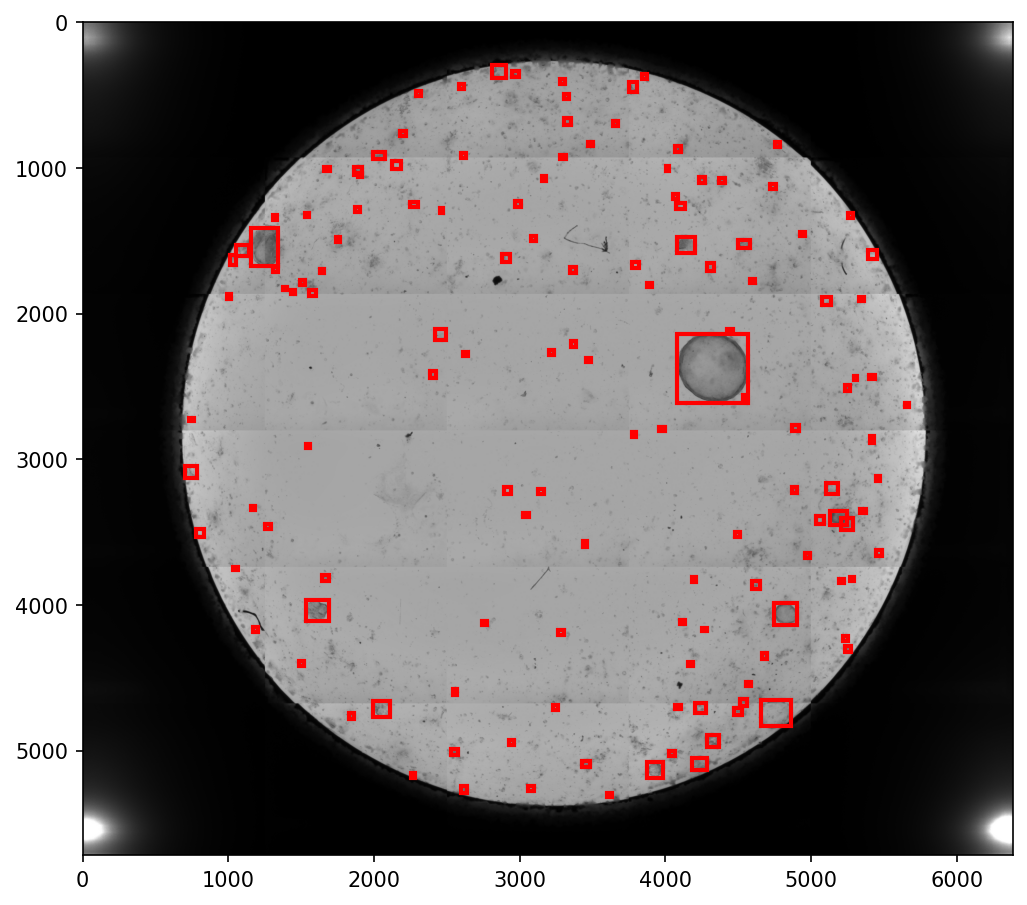

In [28]:
ds_train = dl.MultiOrg(split='train_macros')
len(ds_train)

im, mask, boxes, im_path, im_ID = ds_train[0]
im, flatfield = dl.normalize(im)

# print(boxes)

plot_boxes(im, boxes, format='yxyx_px')

In [8]:
# Load ground truth
train_annotations = pd.read_csv(base_datadir / "Intestinal Organoid Dataset/Intestinal Organoid Dataset/train_labels.csv", header=None)
train_annotations.columns = ["image_path", "x1", "y1", "x2", "y2", "class_name"]
test_annotations = pd.read_csv(base_datadir / "Intestinal Organoid Dataset/Intestinal Organoid Dataset/test_labels.csv")

train_annotations['name'] = train_annotations['image_path'].apply(lambda x: Path(x).name)
test_annotations['name'] = test_annotations['image_path'].apply(lambda x: Path(x).name)

In [10]:
heights = train_annotations['y2'].values - train_annotations['y1'].values
widths = train_annotations['x2'].values - train_annotations['x1'].values
median_size = np.median(np.concatenate([widths, heights], axis=0), axis=0)
patch_size = int(median_size * 8)
patch_size

296

#### Patch extraction

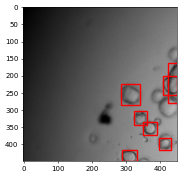

In [11]:
ds_train = dl.OrgaQuant(split='test')

im, mask, boxes, im_path, im_ID = ds_train[100]

plot_boxes(im, boxes, format='yxyx_px')

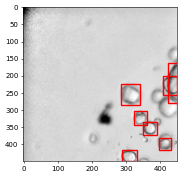

In [12]:
ds_train = dl.OrgaQuant(split='test')

im, mask, boxes, im_path, im_ID = ds_train[100]
im, flatfield = dl.normalize(im, smoothness=10)

plot_boxes(im, boxes, format='yxyx_px')

In [6]:
im.shape

(450, 450, 3)

patch_size 296
450 450 0 0 273 273
mask None


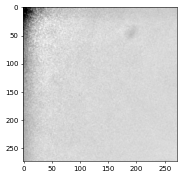

450 450 0 177 273 450
mask None


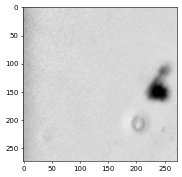

450 450 177 0 450 273
mask None


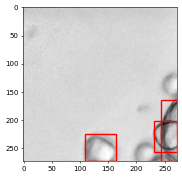

450 450 177 177 450 450
mask None


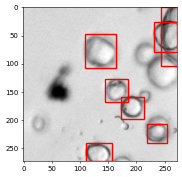

In [13]:
print('patch_size', patch_size)
for im_crop, mask_crop, boxes_crop, offset_x, offset_y in dl.patch(im, mask, boxes, size=patch_size):
    print('mask', mask_crop)
    plot_boxes(im_crop, boxes_crop, format='yxyx_px')

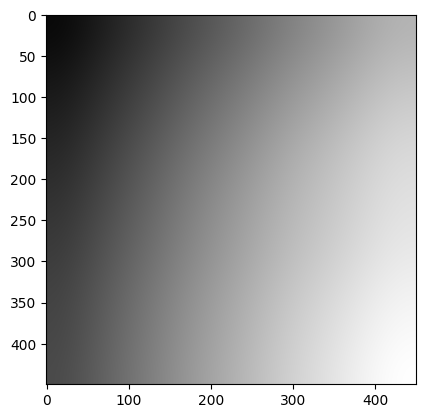

In [ ]:
# plt.imshow(flatfield / flatfield.max())

50


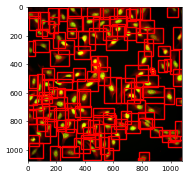

In [14]:
ds_train = dl.NeurIPSCellSeg(split='test')
print(len(ds_train))

im, mask, boxes, im_path, im_ID = ds_train[30]

plot_boxes(im, boxes, format='yxyx_px')

50


Reweighting did not converge.
Estimated flatfield is zero. Please try to decrease smoothness_darkfield.


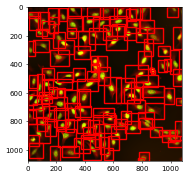

In [15]:
ds_train = dl.NeurIPSCellSeg(split='test')
print(len(ds_train))

im, mask, boxes, im_path, im_ID = ds_train[30]
im, flatfield = dl.normalize(im, smoothness=10)

plot_boxes(im, boxes, format='yxyx_px')

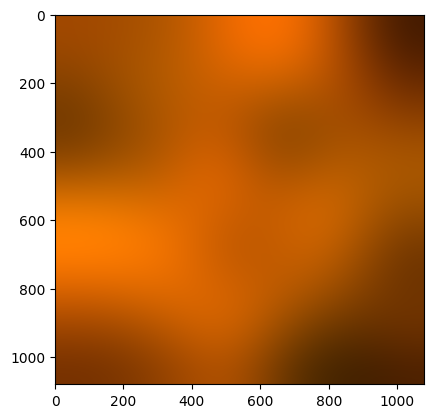

In [20]:
plt.imshow(flatfield / flatfield.max())

((1080, 1080),
 dtype('uint16'),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124], dtype=uint16))

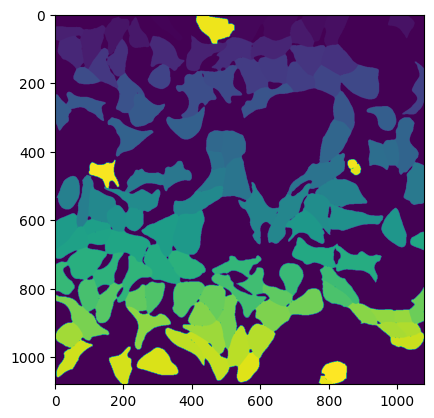

In [21]:
plt.imshow(mask)
mask.shape, mask.dtype, np.unique(mask)

patch_size 716
1080 1080 0 0 658 658
# objects 52


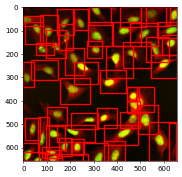

1080 1080 0 422 658 1080
# objects 55


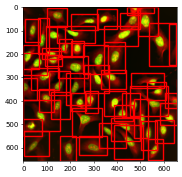

1080 1080 422 0 1080 658
# objects 48


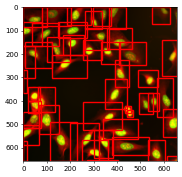

1080 1080 422 422 1080 1080
# objects 53


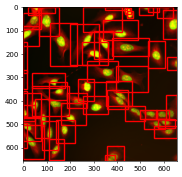

In [16]:
boxes = np.array(boxes)

heights = boxes[:, 2] - boxes[:, 0]
widths = boxes[:, 3] - boxes[:, 1]
median_size = np.median(np.concatenate([widths, heights], axis=0), axis=0)
patch_size = int(median_size * 8)

print('patch_size', patch_size)
for im_crop, mask_crop, boxes_crop, offset_x, offset_y in dl.patch(im, mask, boxes, size=patch_size):
    # print('mask', mask_crop)
    print('# objects', boxes_crop.shape[0])
    plot_boxes(im_crop, boxes_crop, format='yxyx_px')

In [23]:
im.shape, im.dtype, im.max(), im.min()

((1080, 1080, 3), dtype('uint8'), 255, 0)

In [44]:


class OrganoID:
    def __init__(self, split=None, data_folder = base_datadir):
        train = sorted(list(data_folder.glob("OrganoID/OriginalData/training/images/*.*")))
        train_orig = sorted(list(data_folder.glob("OrganoID/OriginalData/training/pre_augmented/images/*.*")))

        val = sorted(list(data_folder.glob("OrganoID/OriginalData/validation/images/*.*")))

        test = sorted(list(data_folder.glob("OrganoID/OriginalData/testing/images/PDAC*.*")))
        test_ACC = sorted(list(data_folder.glob("OrganoID/OriginalData/testing/images/ACC*.*")))
        test_Lung = sorted(list(data_folder.glob("OrganoID/OriginalData/testing/images/Lung*.*")))
        test_C = sorted(list(data_folder.glob("OrganoID/OriginalData/testing/images/C*.*")))
        test_mouse = sorted(list(data_folder.glob("OrganoID/MouseOrganoids/testing/images/*.*"))) + \
            sorted(list(data_folder.glob("OrganoID/MouseOrganoids/validation/images/*.*"))) + \
            sorted(list(data_folder.glob("OrganoID/MouseOrganoids/training/pre_augmented/images/*.*")))

        
        if split == 'train':
            self.images = train
        if split == 'train_orig':
            self.images = train_orig
        elif split == 'val':
            self.images = val
        elif split == 'test':
            self.images = test
        elif split == 'test_ACC':
            self.images = test_ACC
        elif split == 'test_Lung':
            self.images = test_Lung
        elif split == 'test_C':
            self.images = test_C
        elif split == 'test_mouse':
            self.images = test_mouse
        else:
            raise ValueError(split)

    def __getitem__(self, i):
        im_path = self.images[i]
        im_ID = im_path.stem
        
        # Image
        im = skimage.io.imread(im_path, as_gray=False)

        # Instance masks
        mask_path = im_path.parent.parent / 'segmentations' / f"{im_path.stem}.png"
        mask = skimage.io.imread(mask_path, as_gray=True)
        mask = (mask > 0.5).astype(np.uint8)
        mask = skimage.measure.label(mask, return_num=False, connectivity=1)

        # Boxes
        boxes = mask_to_boxes(mask)

        return im, mask, boxes, im_path, im_ID
    
    def __str__(self):
        'OrganoID'
        
    def __len__(self):
        return len(self.images)



10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6321..65535].


(1022, 1024, 3) uint16 65535 6321


<Figure size 640x480 with 0 Axes>

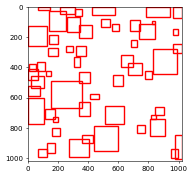

In [17]:
ds_train = dl.OrganoID(split='test')
print(len(ds_train))

im, mask, boxes, im_path, im_ID = ds_train[2]
im = np.stack([im, im, im],axis=-1)

print(im.shape, im.dtype, im.max(), im.min())
# im = ((im - im.min()) / (im.max()-im.min()) * 255).astype(np.uint8)

plt.figure()
plot_boxes(im, boxes, format='yxyx_px')

52
(1024, 1024, 3) uint8 255 0


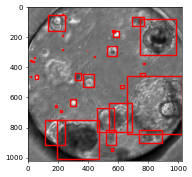

In [18]:
ds_train = dl.OrganoID(split='train_orig')
print(len(ds_train))

im, mask, boxes, im_path, im_ID = ds_train[1]
im, flatfield = dl.normalize(im, smoothness=10)

print(im.shape, im.dtype, im.max(), im.min())

plot_boxes(im, boxes, format='yxyx_px')

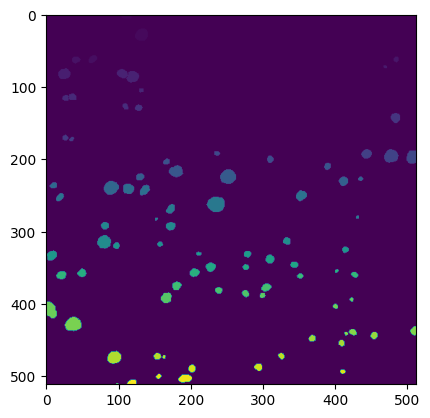

In [35]:
plt.imshow(mask)

patch_size 559
1024 1024 0 0 604 604
# objects 17


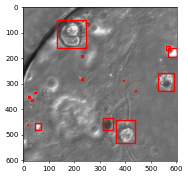

1024 1024 0 420 604 1024
# objects 14


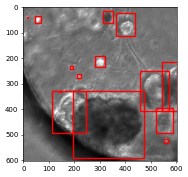

1024 1024 420 0 1024 604
# objects 11


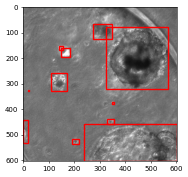

1024 1024 420 420 1024 1024
# objects 10


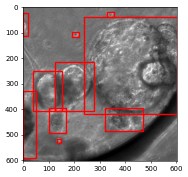

In [19]:
boxes = np.array(boxes)

# heights = boxes[:, 2] - boxes[:, 0]
# widths = boxes[:, 3] - boxes[:, 1]
# median_size = np.median(np.concatenate([widths, heights], axis=0), axis=0)
# patch_size = int(median_size * 8)
H, W = im.shape[:2]
patch_size = int(np.ceil(max(H, W) / (2-1/6)))

print('patch_size', patch_size)
for im_crop, mask_crop, boxes_crop, offset_x, offset_y in dl.patch(im, mask, boxes, size=patch_size):
    # print('mask', mask_crop)
    print('# objects', boxes_crop.shape[0])
    plot_boxes(im_crop, boxes_crop, format='yxyx_px')

15
(1200, 1600, 3) uint8 255 0


<Figure size 640x480 with 0 Axes>

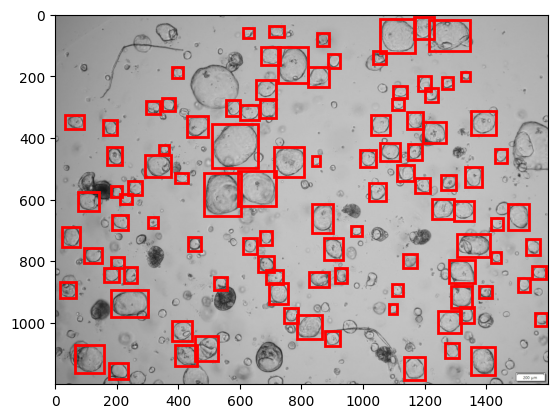

In [48]:
ds_train = OrgaExtractor(split='train')
print(len(ds_train))

im, mask, boxes, im_path, im_ID = ds_train[2]

print(im.shape, im.dtype, im.max(), im.min())
# im = ((im - im.min()) / (im.max()-im.min()) * 255).astype(np.uint8)

plt.figure()
plot_boxes(im, boxes, format='yxyx_px')

10


(1200, 1600, 3) uint8 255 0


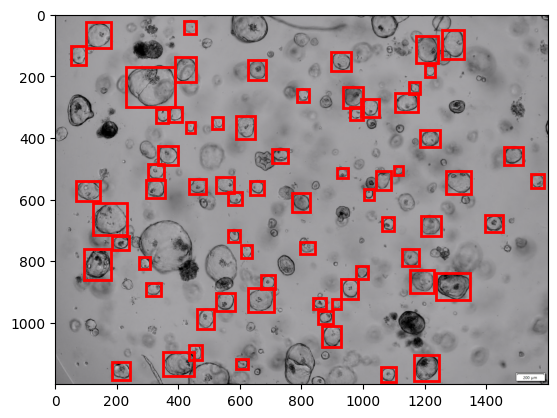

In [49]:
ds_train = OrgaExtractor(split='test')
print(len(ds_train))

im, mask, boxes, im_path, im_ID = ds_train[3]
im, flatfield = normalize(im, smoothness=10)

print(im.shape, im.dtype, im.max(), im.min())

plot_boxes(im, boxes, format='yxyx_px')

patch_size 360
# objects 12


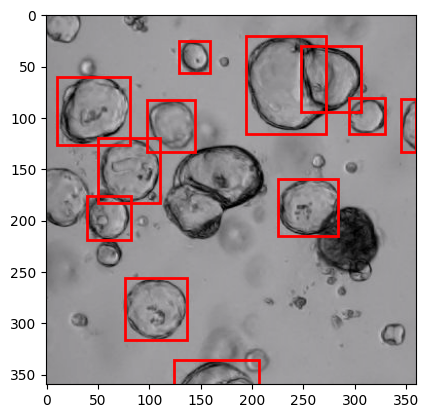

# objects 14


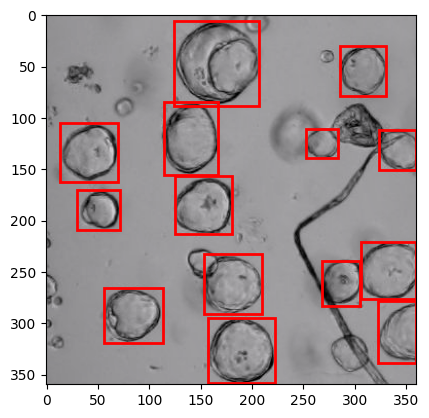

# objects 10


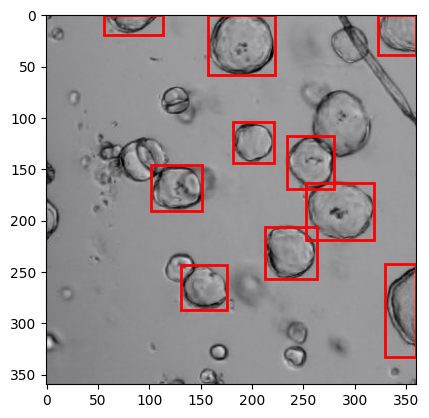

# objects 5


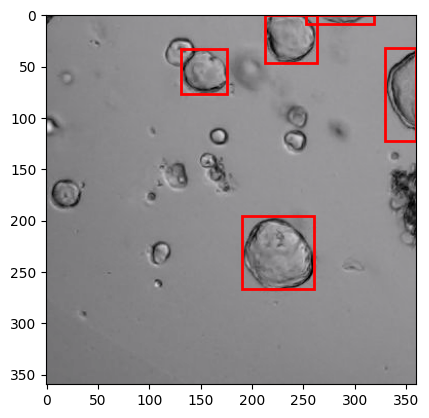

# objects 10


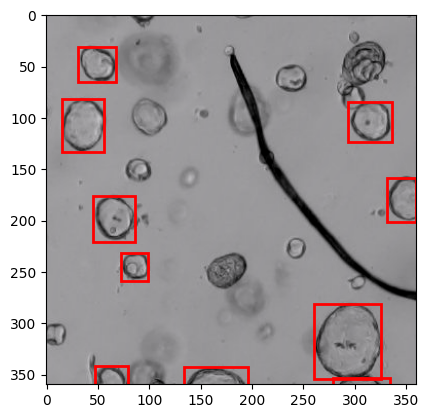

# objects 15


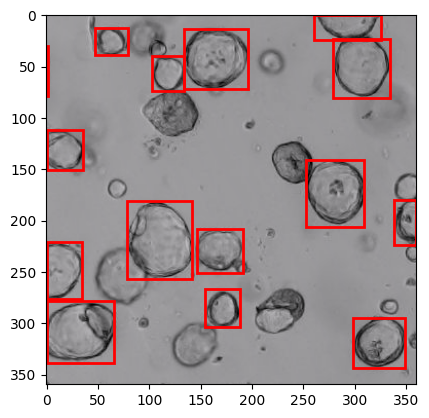

# objects 4


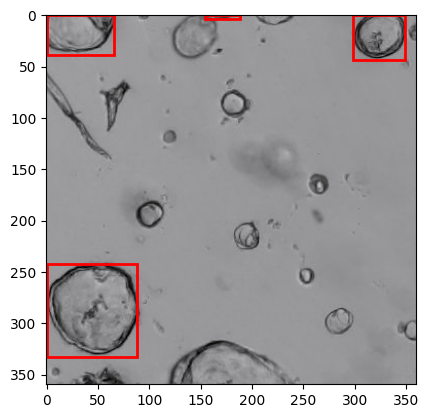

# objects 2


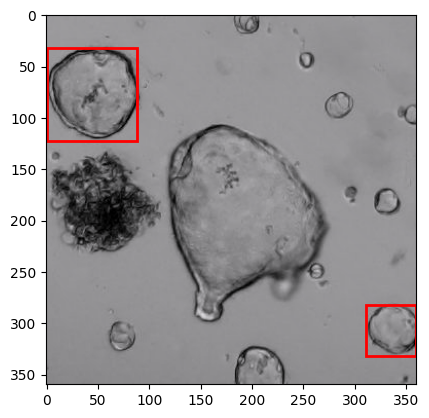

# objects 13


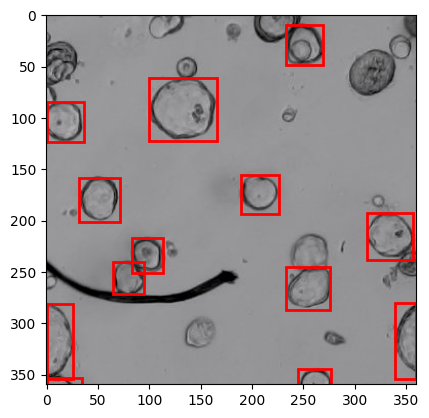

# objects 17


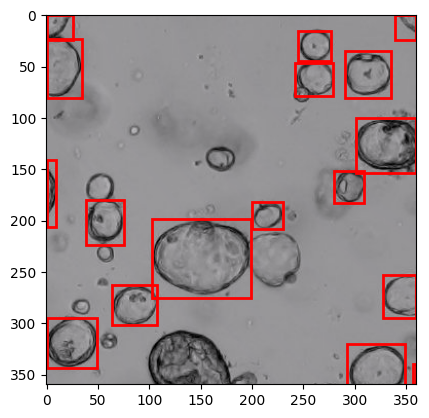

# objects 10


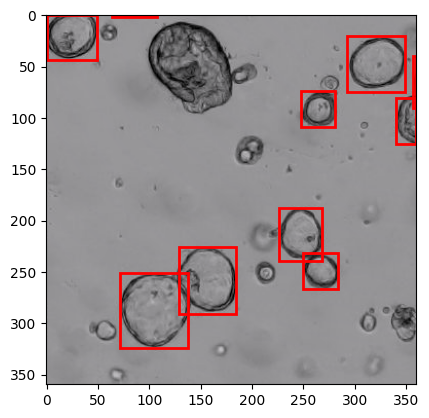

# objects 7


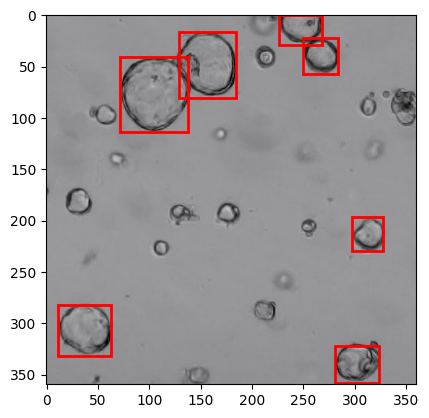

# objects 6


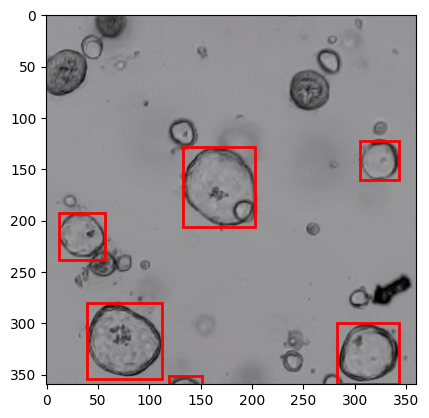

# objects 11


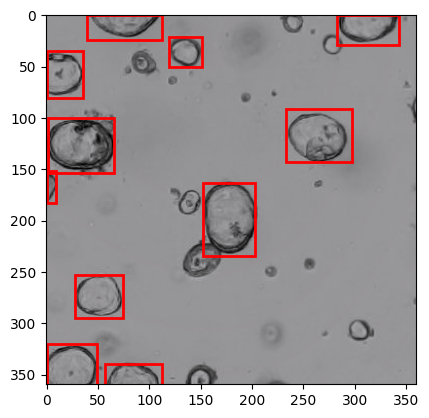

# objects 9


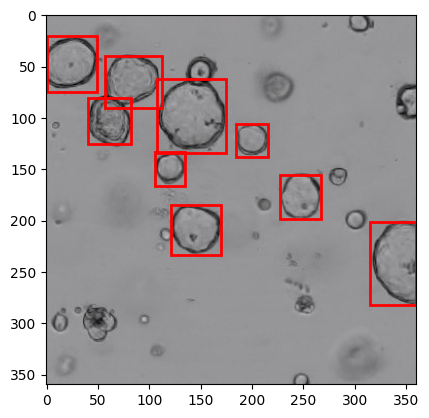

# objects 6


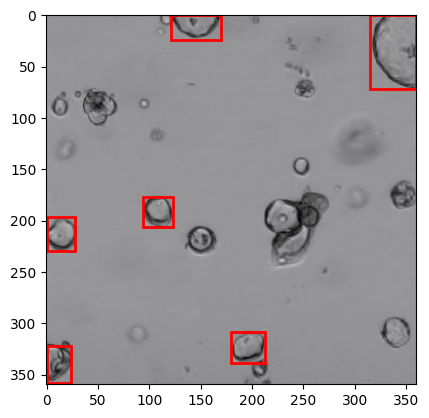

# objects 7


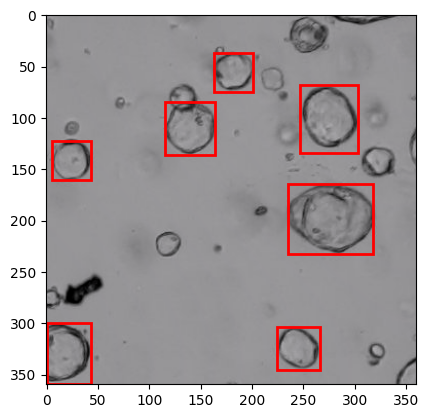

# objects 8


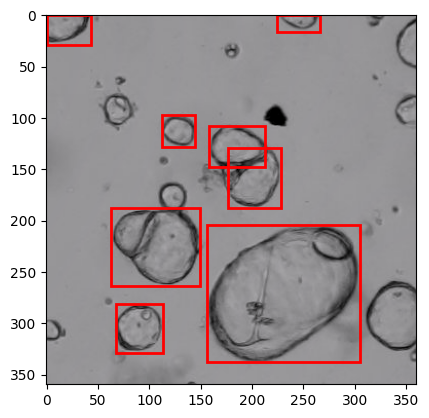

# objects 7


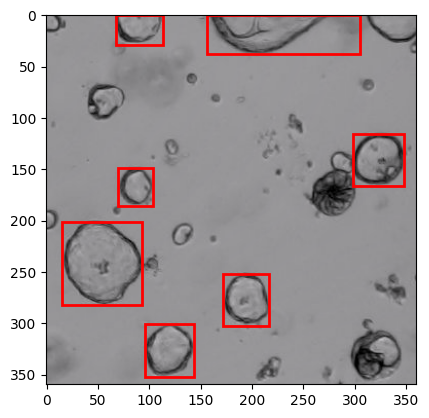

# objects 5


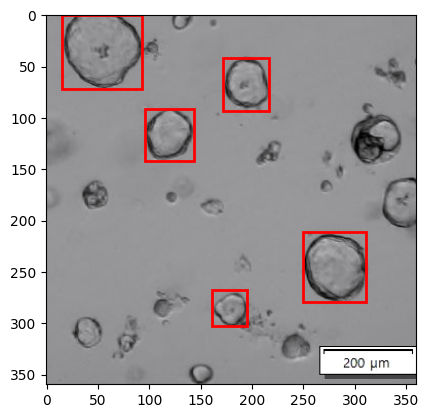

# objects 7


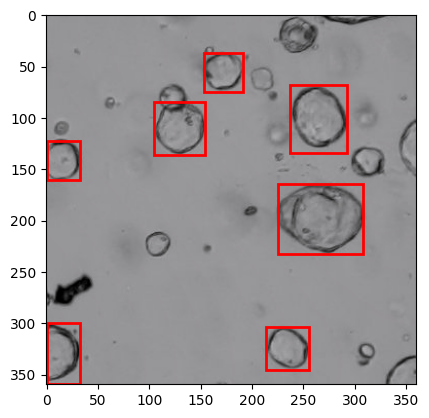

# objects 8


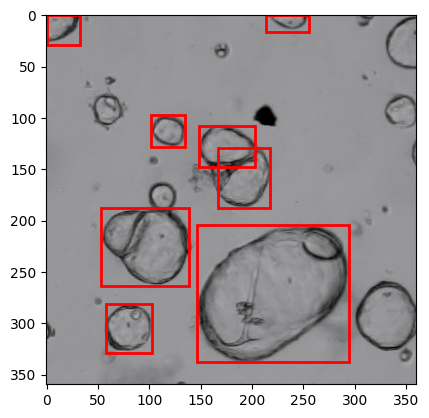

# objects 7


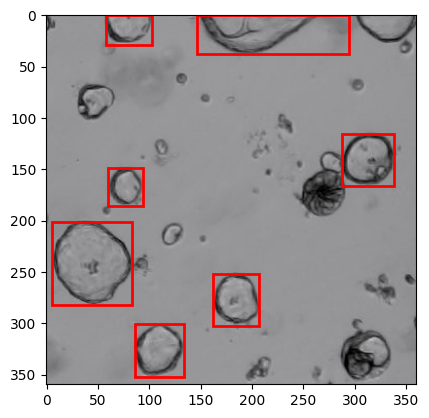

# objects 5


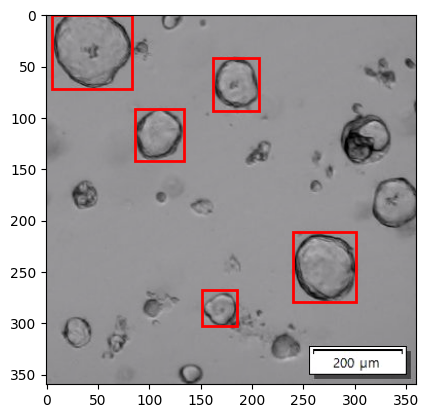

In [42]:
boxes = np.array(boxes)

heights = boxes[:, 2] - boxes[:, 0]
widths = boxes[:, 3] - boxes[:, 1]
median_size = np.median(np.concatenate([widths, heights], axis=0), axis=0)
patch_size = int(median_size * 8)

print('patch_size', patch_size)
for im_crop, mask_crop, boxes_crop, offset_x, offset_y in patch(im, mask, boxes, size=patch_size):
    # print('mask', mask_crop)
    print('# objects', boxes_crop.shape[0])
    plot_boxes(im_crop, boxes_crop, format='yxyx_px')

184
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] uint8
(1024, 1024) uint8 161 13


<Figure size 640x480 with 0 Axes>

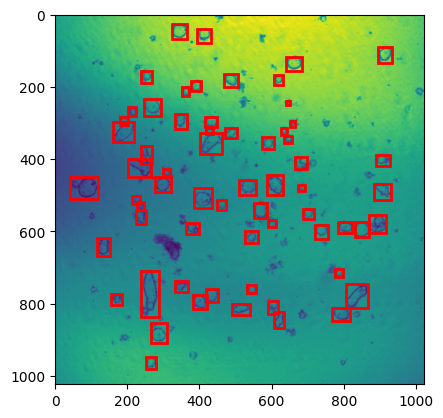

In [56]:
ds_train = OrgaSegment(split='train')
print(len(ds_train))

im, mask, boxes, im_path, im_ID = ds_train[3]

print(im.shape, im.dtype, im.max(), im.min())
# im = ((im - im.min()) / (im.max()-im.min()) * 255).astype(np.uint8)

plt.figure()
plot_boxes(im, boxes, format='yxyx_px')

184
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] uint8
(1024, 1024, 3) uint8 255 0


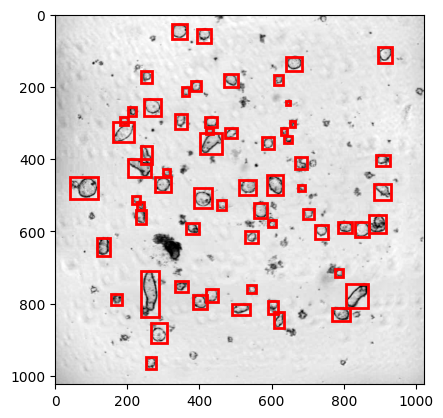

In [58]:
ds_train = OrgaSegment(split='train')
print(len(ds_train))

im, mask, boxes, im_path, im_ID = ds_train[3]
im, flatfield = normalize(im, smoothness=10)

print(im.shape, im.dtype, im.max(), im.min())

plot_boxes(im, boxes, format='yxyx_px')

patch_size 276
# objects 3


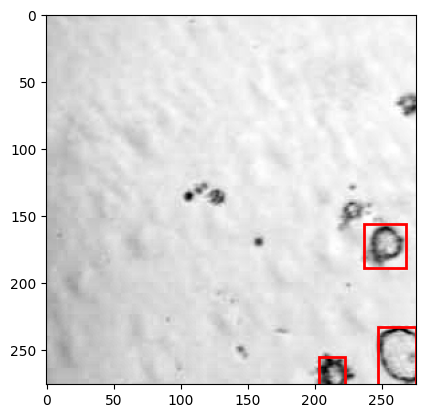

# objects 9


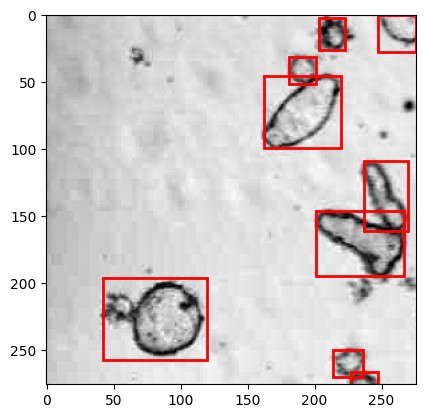

# objects 6


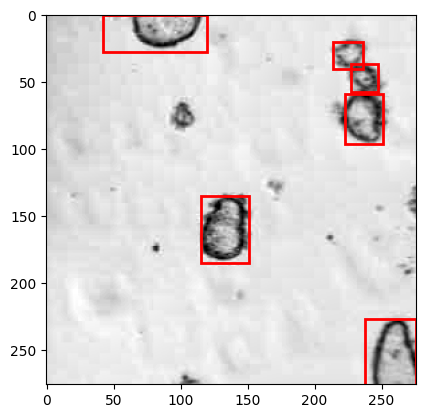

# objects 4


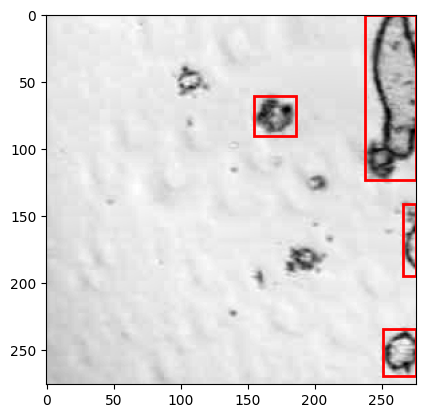

# objects 4


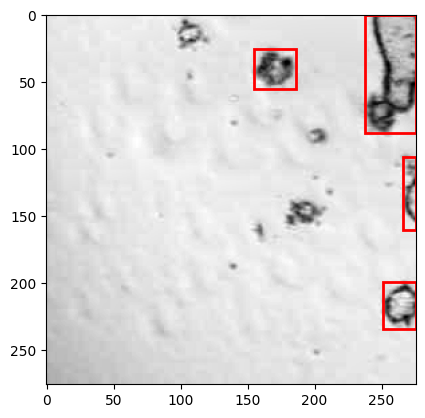

# objects 8


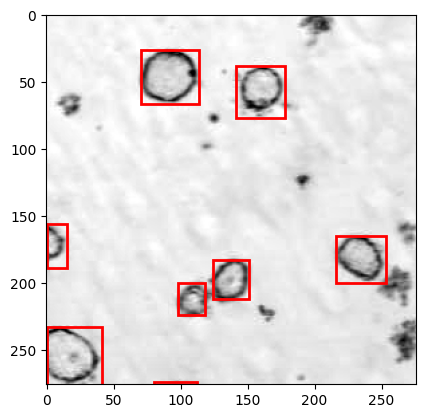

# objects 13


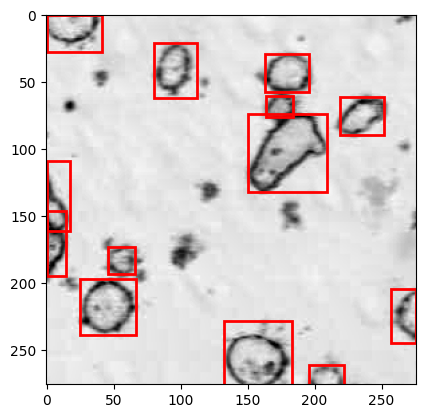

# objects 8


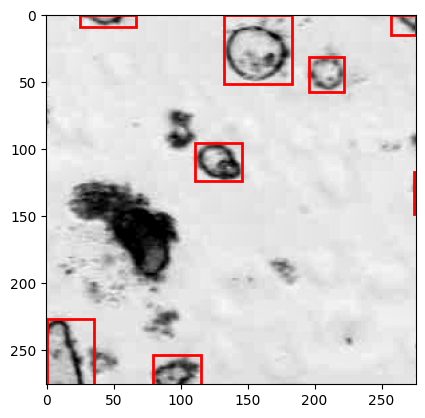

# objects 7


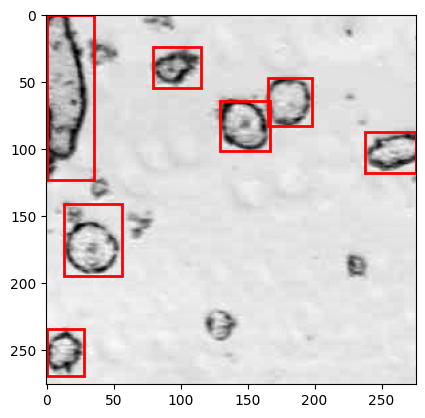

# objects 7


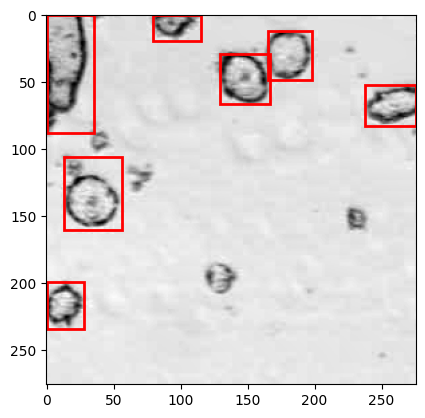

# objects 4


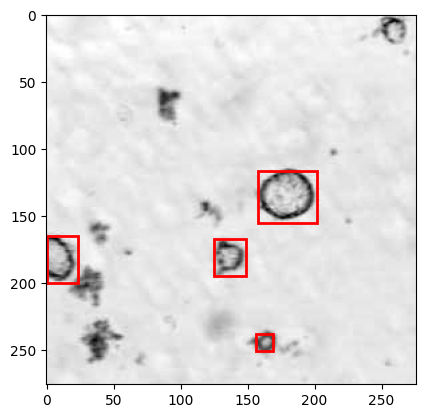

# objects 10


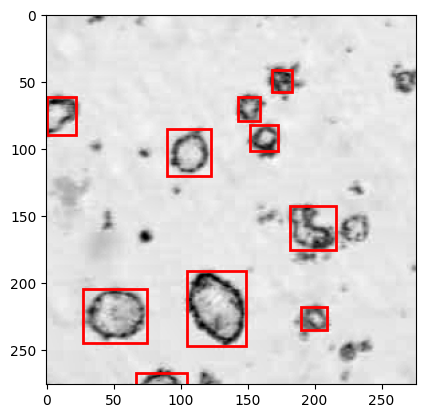

# objects 9


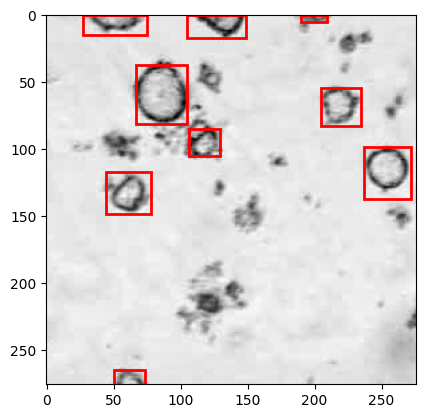

# objects 4


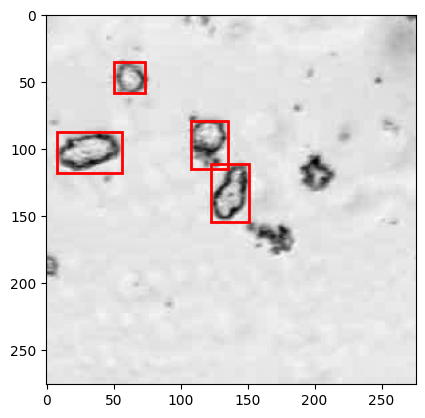

# objects 4


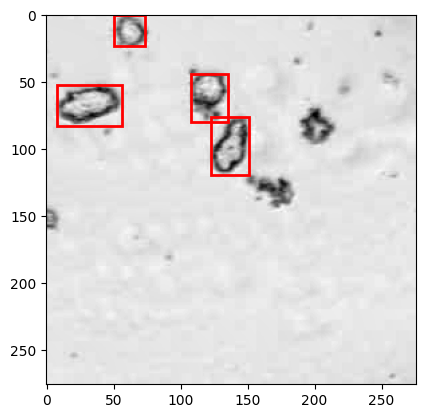

# objects 1


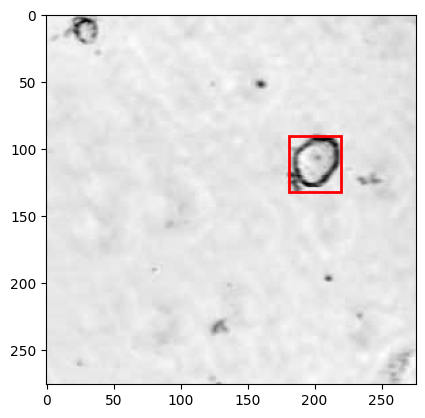

# objects 2


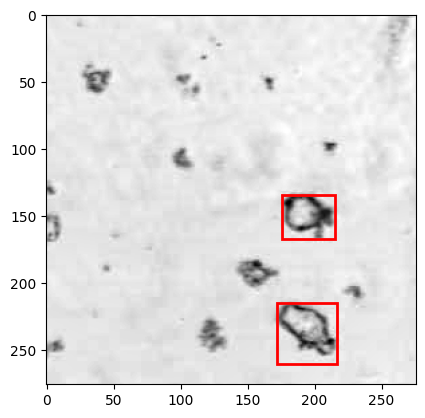

# objects 8


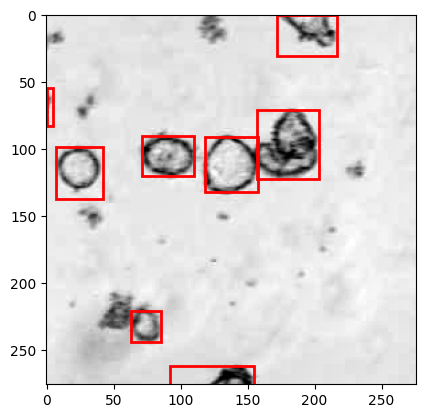

# objects 3


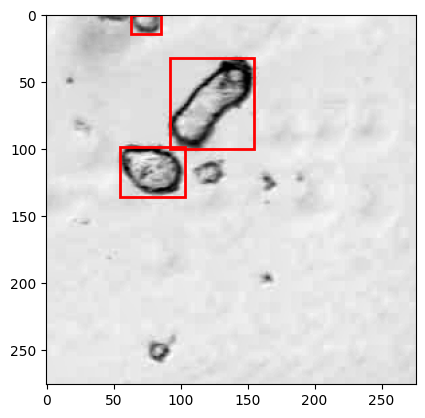

# objects 2


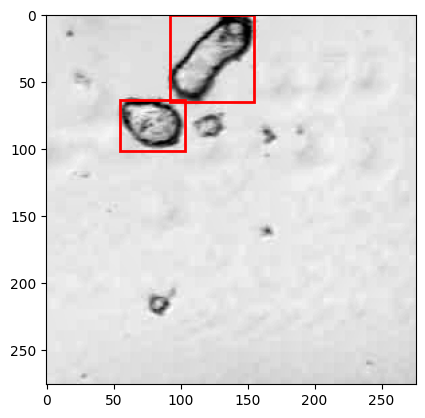

# objects 1


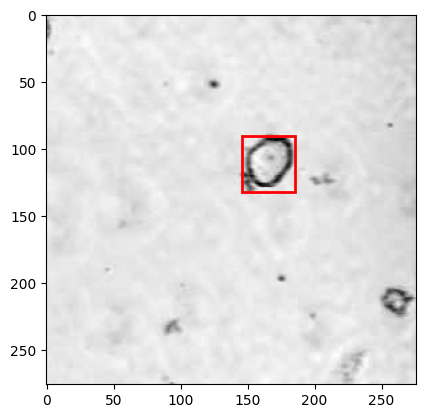

# objects 2


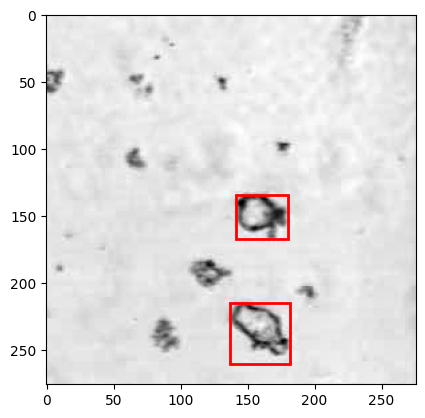

# objects 7


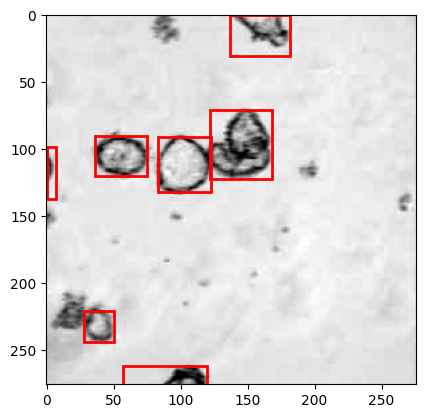

# objects 3


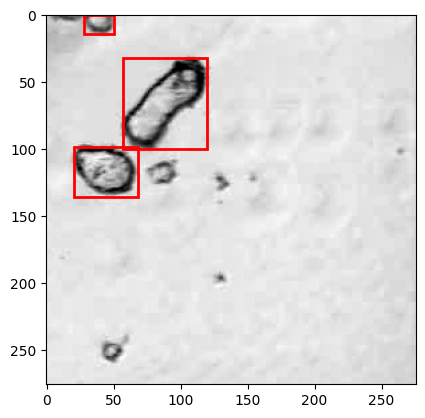

# objects 2


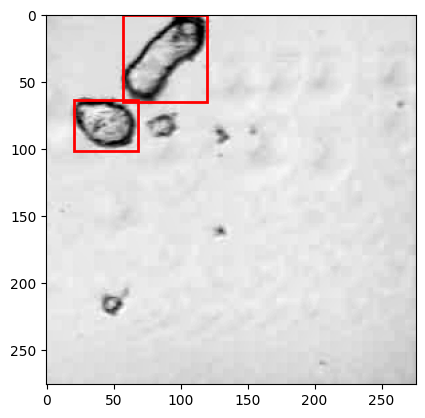

In [59]:
boxes = np.array(boxes)

heights = boxes[:, 2] - boxes[:, 0]
widths = boxes[:, 3] - boxes[:, 1]
median_size = np.median(np.concatenate([widths, heights], axis=0), axis=0)
patch_size = int(median_size * 8)

print('patch_size', patch_size)
for im_crop, mask_crop, boxes_crop, offset_x, offset_y in patch(im, mask, boxes, size=patch_size):
    # print('mask', mask_crop)
    print('# objects', boxes_crop.shape[0])
    plot_boxes(im_crop, boxes_crop, format='yxyx_px')

## Patch extraction and saving

In [ ]:
# OrganoID
train_orig = OrganoID(split='train_orig')

patch_size = compute_patch_size(compute_median_size(train_orig))
print(patch_size)

for data in [
    OrganoID(split='test'),
    OrganoID(split='test_mouse'),
    OrganoID(split='test_C'),
    OrganoID(split='test_Lung'),
    OrganoID(split='test_ACC')
]:
    im, mask, boxes, im_path, im_ID = data[2]
    for im_crop, mask_crop, boxes_crop, offset_x, offset_y in patch(im, mask, boxes, size=patch_size):
        # print('mask', mask_crop)
        print('# objects', boxes_crop.shape[0])
        plot_boxes(im_crop, boxes_crop, format='yxyx_px')

In [ ]:
# NeurIPS

In [ ]:
datasets = [
    NeurIPSCellSeg(split='train'),
    NeurIPSCellSeg(split='val'),
    NeurIPSCellSeg(split='test'),
]

# SAM Encoder for Image Embedding

In [2]:
from segment_anything import sam_model_registry
from segment_anything.separate_sam_encoder import SamEncoder

sam_checkpoint = "/home/icb/hanyi.zhang/Detection_Head/segment-anything/sam_vit_l_0b3195.pth"
model_type = "vit_l"

device = "cuda"
#device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

sam_image_encoder = SamEncoder(sam, device)

In [4]:
import os
from PIL import Image
import numpy as np

def emb_images(image_folder, embed_folder, encoder):
    """
    Process images to obtain embeddings and save them.

    Parameters:
    - image_folder: str, path to the folder containing source images
    - embed_folder: str, path to the folder where embeddings will be saved
    - encoder: the encoder object that processes images to obtain embeddings
    """
    # Create the embedding directory if it doesn't exist
    os.makedirs(embed_folder, exist_ok=True)
    
    # List all files in the image directory
    images = os.listdir(image_folder)
    
    # Iterate over each image file
    for i, img in enumerate(images, start=1):
        if i % 100 == 0:
            print(f"Processed {i} images.")
        
        # Construct full path to the image file
        img_path = os.path.join(image_folder, img)
        #print(img_path)
        
        # Load the image file and convert it to a numpy array
        with Image.open(img_path) as image:
            image = image.convert('RGB')
            img_np = np.array(image)
        
        # Process the image to get its embedding
        img_embed = encoder.set_image(img_np)
        
        # Replace the original extension with 'npy' for the output file
        embed_path = os.path.join(embed_folder, os.path.splitext(img)[0] + '.npy')
        
        # Save the embedding to the specified path
        np.save(embed_path, img_embed.cpu().detach().numpy())


In [5]:
# Training dataset
base_folder = '/home/icb/hanyi.zhang/own_organoid_dataset'
img_patch_dir = os.path.join(base_folder, 'image_patches_filter')
embed_folder = os.path.join(base_folder, 'images_emb')
emb_images(img_patch_dir, embed_folder, sam_image_encoder)

Processed 100 images.
Processed 200 images.
Processed 300 images.
Processed 400 images.


# Use SAM built-in function for mask coordinates processing

In [6]:
import numpy as np
import os

def preprocess_boxes(mask_dir, box_dir):
    # Create the directory
    os.makedirs(box_dir, exist_ok=True)

    processed_count = 0
    # Loop through each file in the directory
    for file_name in os.listdir(mask_dir):
        label_file = np.load(os.path.join(mask_dir, file_name), allow_pickle=True)
        transformed_coord = sam_image_encoder.set_box_coordinates(label_file)

        # Normalization
        transformed_coord = transformed_coord / 1024

        # save boxes
        np.save(os.path.join(box_dir, file_name), transformed_coord)

        # Increment the counter for each augmented image
        processed_count += 1
        
        # Print the number of processed images every 100 images
        if processed_count % 100 == 0:
            print(f"Processed {processed_count} images.")


In [7]:
# Training dataset
base_folder = '/home/icb/hanyi.zhang/own_organoid_dataset'
mask_dir = os.path.join(base_folder, 'label_patches_filter')
box_dir = os.path.join(base_folder, 'bboxes')
preprocess_boxes(mask_dir, box_dir)

Processed 100 images.
Processed 200 images.
Processed 300 images.
Processed 400 images.


# Transform coordinates format

In [ ]:
import numpy as np
import os
import pandas as pd

def trans_boxes(ori_box_file, trans_box_dir, sam_image_encoder):
    # Create the directory if it doesn't exist
    os.makedirs(trans_box_dir, exist_ok=True)

    # Load the CSV file into a DataFrame
    df = pd.read_csv(ori_box_file)
    
    # Group by image path to process each image separately
    grouped = df.groupby(df.columns[0])
    
    # Initialize a counter for processed images
    processed_count = 0
    
    for image_path, group in grouped:
        # Extract the file name from the image path
        file_name = os.path.basename(image_path)
        
        # Extract the original size from the file name
        if '450x450' in file_name:
            ori_size = (450, 450)
        elif '300x300' in file_name:
            ori_size = (300, 300)
        else:
            # Default or additional logic if needed
            raise ValueError(f"Unknown size in file name: {file_name}")
        
        # Extract the bounding box coordinates as a numpy array
        bboxes = group.iloc[:, 1:5].values
        
        # Transform the box coordinates using SAM's image encoder
        transformed_coord = sam_image_encoder.trans_box_coordinates(bboxes, ori_size)
        
        # Normalize the transformed coordinates
        transformed_coord = transformed_coord / 1024
        
        # Replace file extension with .npy
        npy_file_name = os.path.splitext(file_name)[0] + '.npy'
        
        # Save the transformed coordinates as a .npy file
        np.save(os.path.join(trans_box_dir, npy_file_name), transformed_coord)
        
        # Increment the counter
        processed_count += 1
        
        # Print the number of processed images every 100 images
        if processed_count % 100 == 0:
            print(f"Processed {processed_count} images.")
            


In [ ]:
label_file = "/home/icb/hanyi.zhang/public_organoid_datasets/OrgaQuant_DeepOrga_dataset/Intestinal_Organoid_Dataset/train_labels.csv"
df = pd.read_csv(label_file)
grouped = df.groupby(df.columns[0])

In [ ]:
i=0
names_labels = []
for image_path, group in grouped:
    i+=1
    file_name = os.path.basename(image_path)
    names_labels.append(file_name)

names_images = os.listdir('/home/icb/hanyi.zhang/public_organoid_datasets/OrgaQuant_DeepOrga_dataset/Intestinal_Organoid_Dataset/training/images')

In [ ]:
len(names_images)

In [ ]:
len(names_labels)

In [ ]:
# Find all files in names_images but not in names_labels
missing_labels = [image for image in names_images if image not in names_labels]

# Save the result in a new list
print(f"Files in names_images but not in names_labels: {len(missing_labels)}")
print(missing_labels)

In [ ]:
import os

# Assuming missing_labels is your list of missing files

# Directory where the .npy files are located
npy_dir = '/home/icb/hanyi.zhang/public_organoid_datasets/OrgaQuant_DeepOrga_dataset/Intestinal_Organoid_Dataset/training/images_emb'

# Replace 'jpg' with 'npy' in the missing_labels and delete the corresponding files
for name in missing_labels:
    npy_name = name.replace('.jpg', '.npy')
    npy_path = os.path.join(npy_dir, npy_name)
    
    if os.path.exists(npy_path):
        os.remove(npy_path)
        print(f"Deleted: {npy_path}")
    else:
        print(f"File not found: {npy_path}")


In [ ]:
label_file = "/home/icb/hanyi.zhang/public_organoid_datasets/OrgaQuant_DeepOrga_dataset/Intestinal_Organoid_Dataset/train_labels.csv"
output_folder = "/home/icb/hanyi.zhang/public_organoid_datasets/OrgaQuant_DeepOrga_dataset/Intestinal_Organoid_Dataset/training/boxes"
trans_boxes(label_file, output_folder, sam_image_encoder)

In [ ]:
label_file = "/home/icb/hanyi.zhang/public_organoid_datasets/OrgaQuant_DeepOrga_dataset/Intestinal_Organoid_Dataset/test_labels.csv"
output_folder = "/home/icb/hanyi.zhang/public_organoid_datasets/OrgaQuant_DeepOrga_dataset/Intestinal_Organoid_Dataset/test/boxes"
trans_boxes(label_file, output_folder, sam_image_encoder)

# Transform bboxes to the original size

In [ ]:
import numpy as np
from PIL import Image
from copy import deepcopy
from typing import Tuple
import random

# Define the transformation functions
def get_preprocess_shape(oldh: int, oldw: int, long_side_length: int) -> Tuple[int, int]:
    """
    Compute the output size given input size and target long side length.
    """
    scale = long_side_length * 1.0 / max(oldh, oldw)
    newh, neww = oldh * scale, oldw * scale
    neww = int(neww + 0.5)
    newh = int(newh + 0.5)
    return (newh, neww)

def inverse_coords(coords: np.ndarray, original_size: Tuple[int, int], target_length=1024) -> np.ndarray:
    """
    Inverse transformation of coordinates from resized back to original.
    """
    old_h, old_w = original_size
    new_h, new_w = get_preprocess_shape(old_h, old_w, target_length)
    coords = deepcopy(coords).astype(float)
    coords[..., 0] = coords[..., 0] * (old_w / new_w)
    coords[..., 1] = coords[..., 1] * (old_h / new_h)
    return coords

def inverse_boxes(boxes: np.ndarray, original_size: Tuple[int, int], target_length=1024) -> np.ndarray:
    """
    Inverse transformation of boxes from resized back to original.
    """
    boxes = inverse_coords(boxes.reshape(-1, 2, 2), original_size, target_length)
    return boxes.reshape(-1, 4)

def convert_boxes(boxes):
    # Convert the boxes from center format to [y_min, x_min, y_max, x_max] format
    converted_boxes = np.zeros_like(boxes)
    converted_boxes[:, 0] = boxes[:, 1] - boxes[:, 3] / 2.0  # x_min
    converted_boxes[:, 1] = boxes[:, 0] - boxes[:, 2] / 2.0  # y_min
    converted_boxes[:, 2] = boxes[:, 1] + boxes[:, 3] / 2.0  # x_max
    converted_boxes[:, 3] = boxes[:, 0] + boxes[:, 2] / 2.0  # y_max
    return converted_boxes

img_folder = '/home/icb/hanyi.zhang/public_organoid_datasets/OrgaQuant_DeepOrga_dataset/Intestinal_Organoid_Dataset/training/images'
box_folder = '/home/icb/hanyi.zhang/public_organoid_datasets/OrgaQuant_DeepOrga_dataset/Intestinal_Organoid_Dataset/training/boxes'

img_name = random.choice(os.listdir(img_folder))
img = Image.open(os.path.join(img_folder, img_name))
box = np.load(os.path.join(box_folder, img_name.replace('jpg', 'npy')))

img_np = np.array(img)

original_size = img.size  # (width, height)
original_size = (original_size[1], original_size[0])  # Convert to (height, width)

original_boxes = inverse_boxes(convert_boxes(box) * 1024, original_size)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Convert the image back to (height, width) format for plotting
img_np = np.array(img)

# Plot the image
fig, ax = plt.subplots(1)
ax.imshow(img_np)

# Plot each bounding box
for box in original_boxes:
    # The coordinates of the box are in [y_min, x_min, y_max, x_max] format
    y_min, x_min, y_max, x_max = box
    
    # Calculate width and height of the box
    width = x_max - x_min
    height = y_max - y_min
    
    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)

# Display the plot
plt.show()
